In [ ]:
!pip uninstall numba pynndescent -y
!pip install numba==0.59.0 pynndescent==0.5.11

In [11]:
import scanpy as sc
import numpy as np

In [12]:
adata = sc.read_h5ad('/home/workspace/private/Anndata_Normalized_NaNRemoved.h5ad')
adata

AnnData object with n_obs × n_vars = 2147278 × 52
    obs: 'cell_id', 'sample_id', 'Timeframe', 'batch_id', 'x', 'y', 'Outline Area (µm²)', 'Perimeter (µm)', 'Circularity'
    var: 'marker_name'
    layers: 'intensity_mean', 'intensity_median', 'intensity_std', 'normalized'

In [3]:
# Check for problematic values in the normalized layer
layer_data = adata.layers['normalized']
print(f"Min: {np.min(layer_data)}")
print(f"Max: {np.max(layer_data)}")
print(f"Any NaN: {np.any(np.isnan(layer_data))}")
print(f"Any Inf: {np.any(np.isinf(layer_data))}")

# Check for extreme values
print(f"Number of very large values (>100): {np.sum(layer_data > 100)}")

Min: 0.0
Max: 69145.46940170092
Any NaN: False
Any Inf: False
Number of very large values (>100): 73906000


In [14]:
'''
THIS COMMENT IS UNECESSARY, MIF DOES NOT NEED DIMENSION REDUCTIONVAND UNIFORM SHOULD MAKE LOG REDUNDANT

# Clean NaNs and log-transform
adata.layers['normalized_clean'] = np.nan_to_num(
    adata.layers['normalized'], 
    nan=0.0
)

# LOG-TRANSFORM the data (this is the key step!)
adata.layers['log_normalized'] = np.log1p(adata.layers['normalized_clean'])

# Check the transformed values
print(f"After log transform - Min: {np.min(adata.layers['log_normalized'])}")
print(f"After log transform - Max: {np.max(adata.layers['log_normalized'])}")

# Now run HVG detection on the log-transformed data
sc.pp.highly_variable_genes(
    adata, 
    n_top_genes=2000, 
    batch_key="sample_id",
    layer="log_normalized"
)

sc.pl.highly_variable_genes(adata)

# Put the clean, log-transformed data into .X for downstream analysis
adata.X = adata.layers['log_normalized'].copy()

# Verify it's clean
print(f"Any NaN in .X: {np.any(np.isnan(adata.X))}")
print(f"Any Inf in .X: {np.any(np.isinf(adata.X))}")

sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)
'''

# standard workflow that carries over 
sc.pp.neighbors(adata, use_rep='X')
sc.tl.umap(adata)
sc.tl.leiden(adata, n_iterations=2)

adata

/home/workspace/environment/scanpyv2/lib/python3.11/site-packages/umap/spectral.py:342: UserWarning: Exited at iteration 20 with accuracies 
[0.01485566 0.0145603  0.01622877]
not reaching the requested tolerance 1e-08.
Use iteration 21 instead with accuracy 
0.015214910535568399.

  eigenvalues, eigenvectors = scipy.sparse.linalg.lobpcg(
/home/workspace/environment/scanpyv2/lib/python3.11/site-packages/umap/spectral.py:342: UserWarning: Exited postprocessing with accuracies 
[0.01485566 0.0145603  0.01622877]
not reaching the requested tolerance 1e-08.
  eigenvalues, eigenvectors = scipy.sparse.linalg.lobpcg(


In [16]:
# Check that results exist
print(f"PCA computed: {'X_pca' in adata.obsm}")
print(f"UMAP computed: {'X_umap' in adata.obsm}")
print(f"Leiden clusters: {'leiden' in adata.obs}")
print(f"Number of clusters: {adata.obs['leiden'].nunique()}")
print(f"Data shape: {adata.shape}")

PCA computed: False
UMAP computed: True
Leiden clusters: True
Number of clusters: 61
Data shape: (2147278, 52)


In [7]:
adata.write('clustered_adata_NotLogNormalized.h5ad')

# Plotting/Data Exploration

In [2]:
adata = sc.read_h5ad('/home/workspace/private/clustered_adata_NotLogNormalized.h5ad')

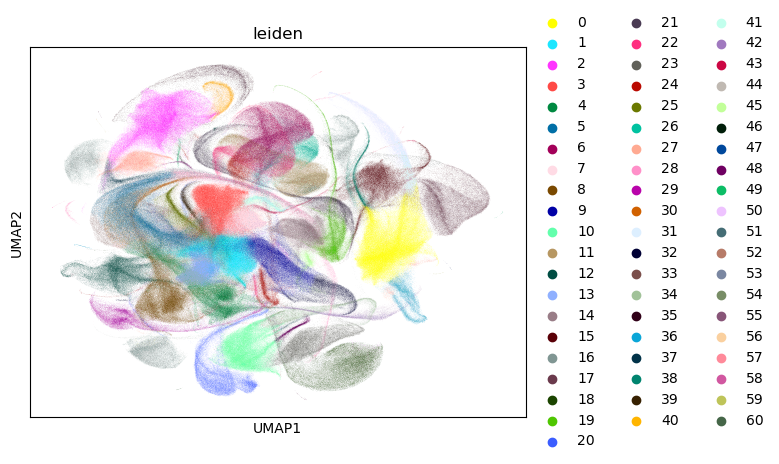

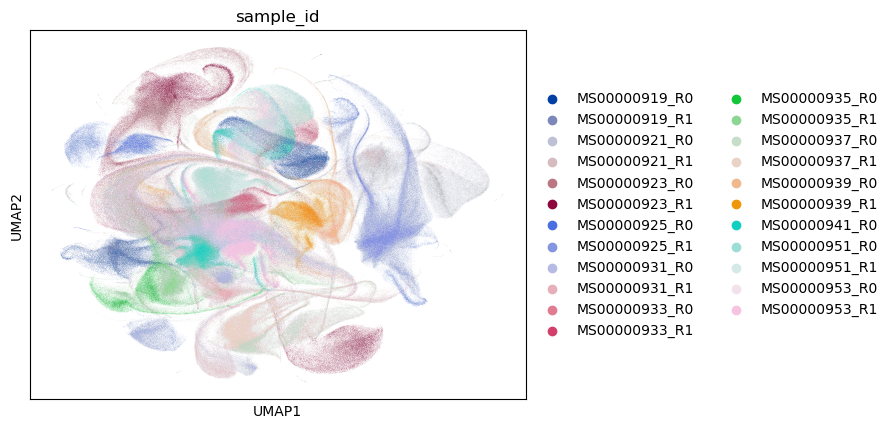

"\n# Plot multiple QC metrics\nsc.pl.umap(adata, color=['leiden', 'sample_id', 'n_genes', 'n_counts'])\n"

In [19]:
# Plot UMAP colored by clusters
sc.pl.umap(adata, color='leiden')

# Plot UMAP colored by batch
sc.pl.umap(adata, color='sample_id')
'''
# Plot multiple QC metrics
sc.pl.umap(adata, color=['leiden', 'sample_id', 'n_genes', 'n_counts'])
'''

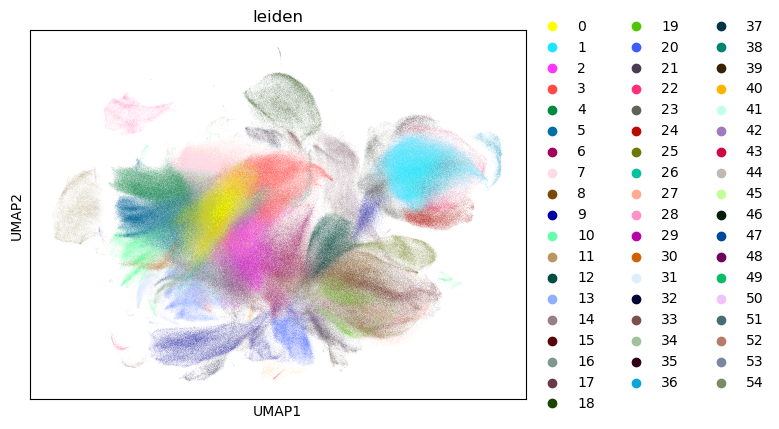

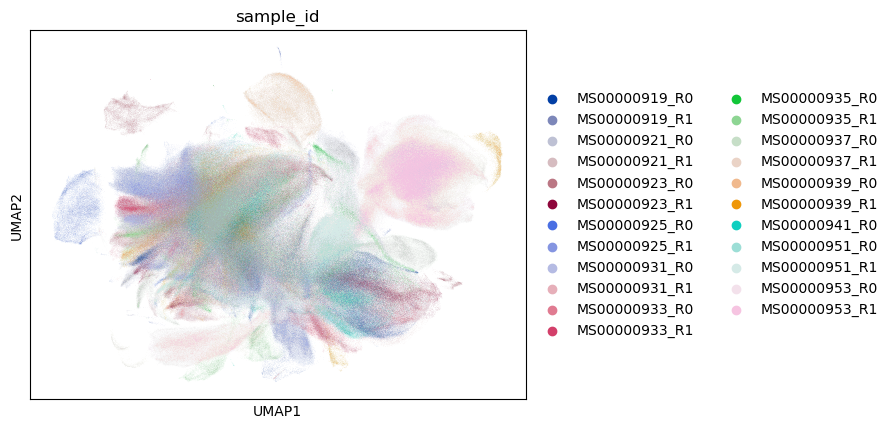

"\n# Plot multiple QC metrics\nsc.pl.umap(adata, color=['leiden', 'sample_id', 'n_genes', 'n_counts'])\n"

In [7]:
# Plot UMAP colored by clusters
sc.pl.umap(adata, color='leiden')

# Plot UMAP colored by batch
sc.pl.umap(adata, color='sample_id')
'''
# Plot multiple QC metrics
sc.pl.umap(adata, color=['leiden', 'sample_id', 'n_genes', 'n_counts'])
'''

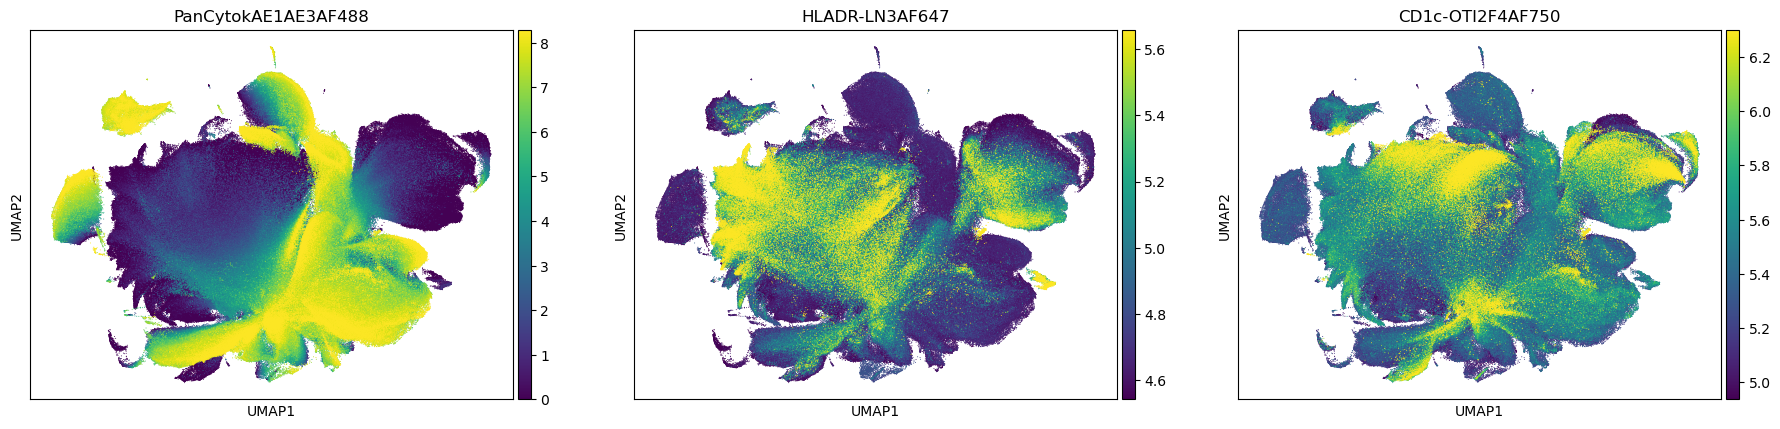

In [32]:
#PanCytokAE1AE3AF488

sc.pl.umap(
    adata,
    color=["PanCytokAE1AE3AF488", "HLADR-LN3AF647", "CD1c-OTI2F4AF750"],
    vmax = "p99",
    vmin = "p10",
    # Setting a smaller point size to get prevent overlap
    size=2,
)

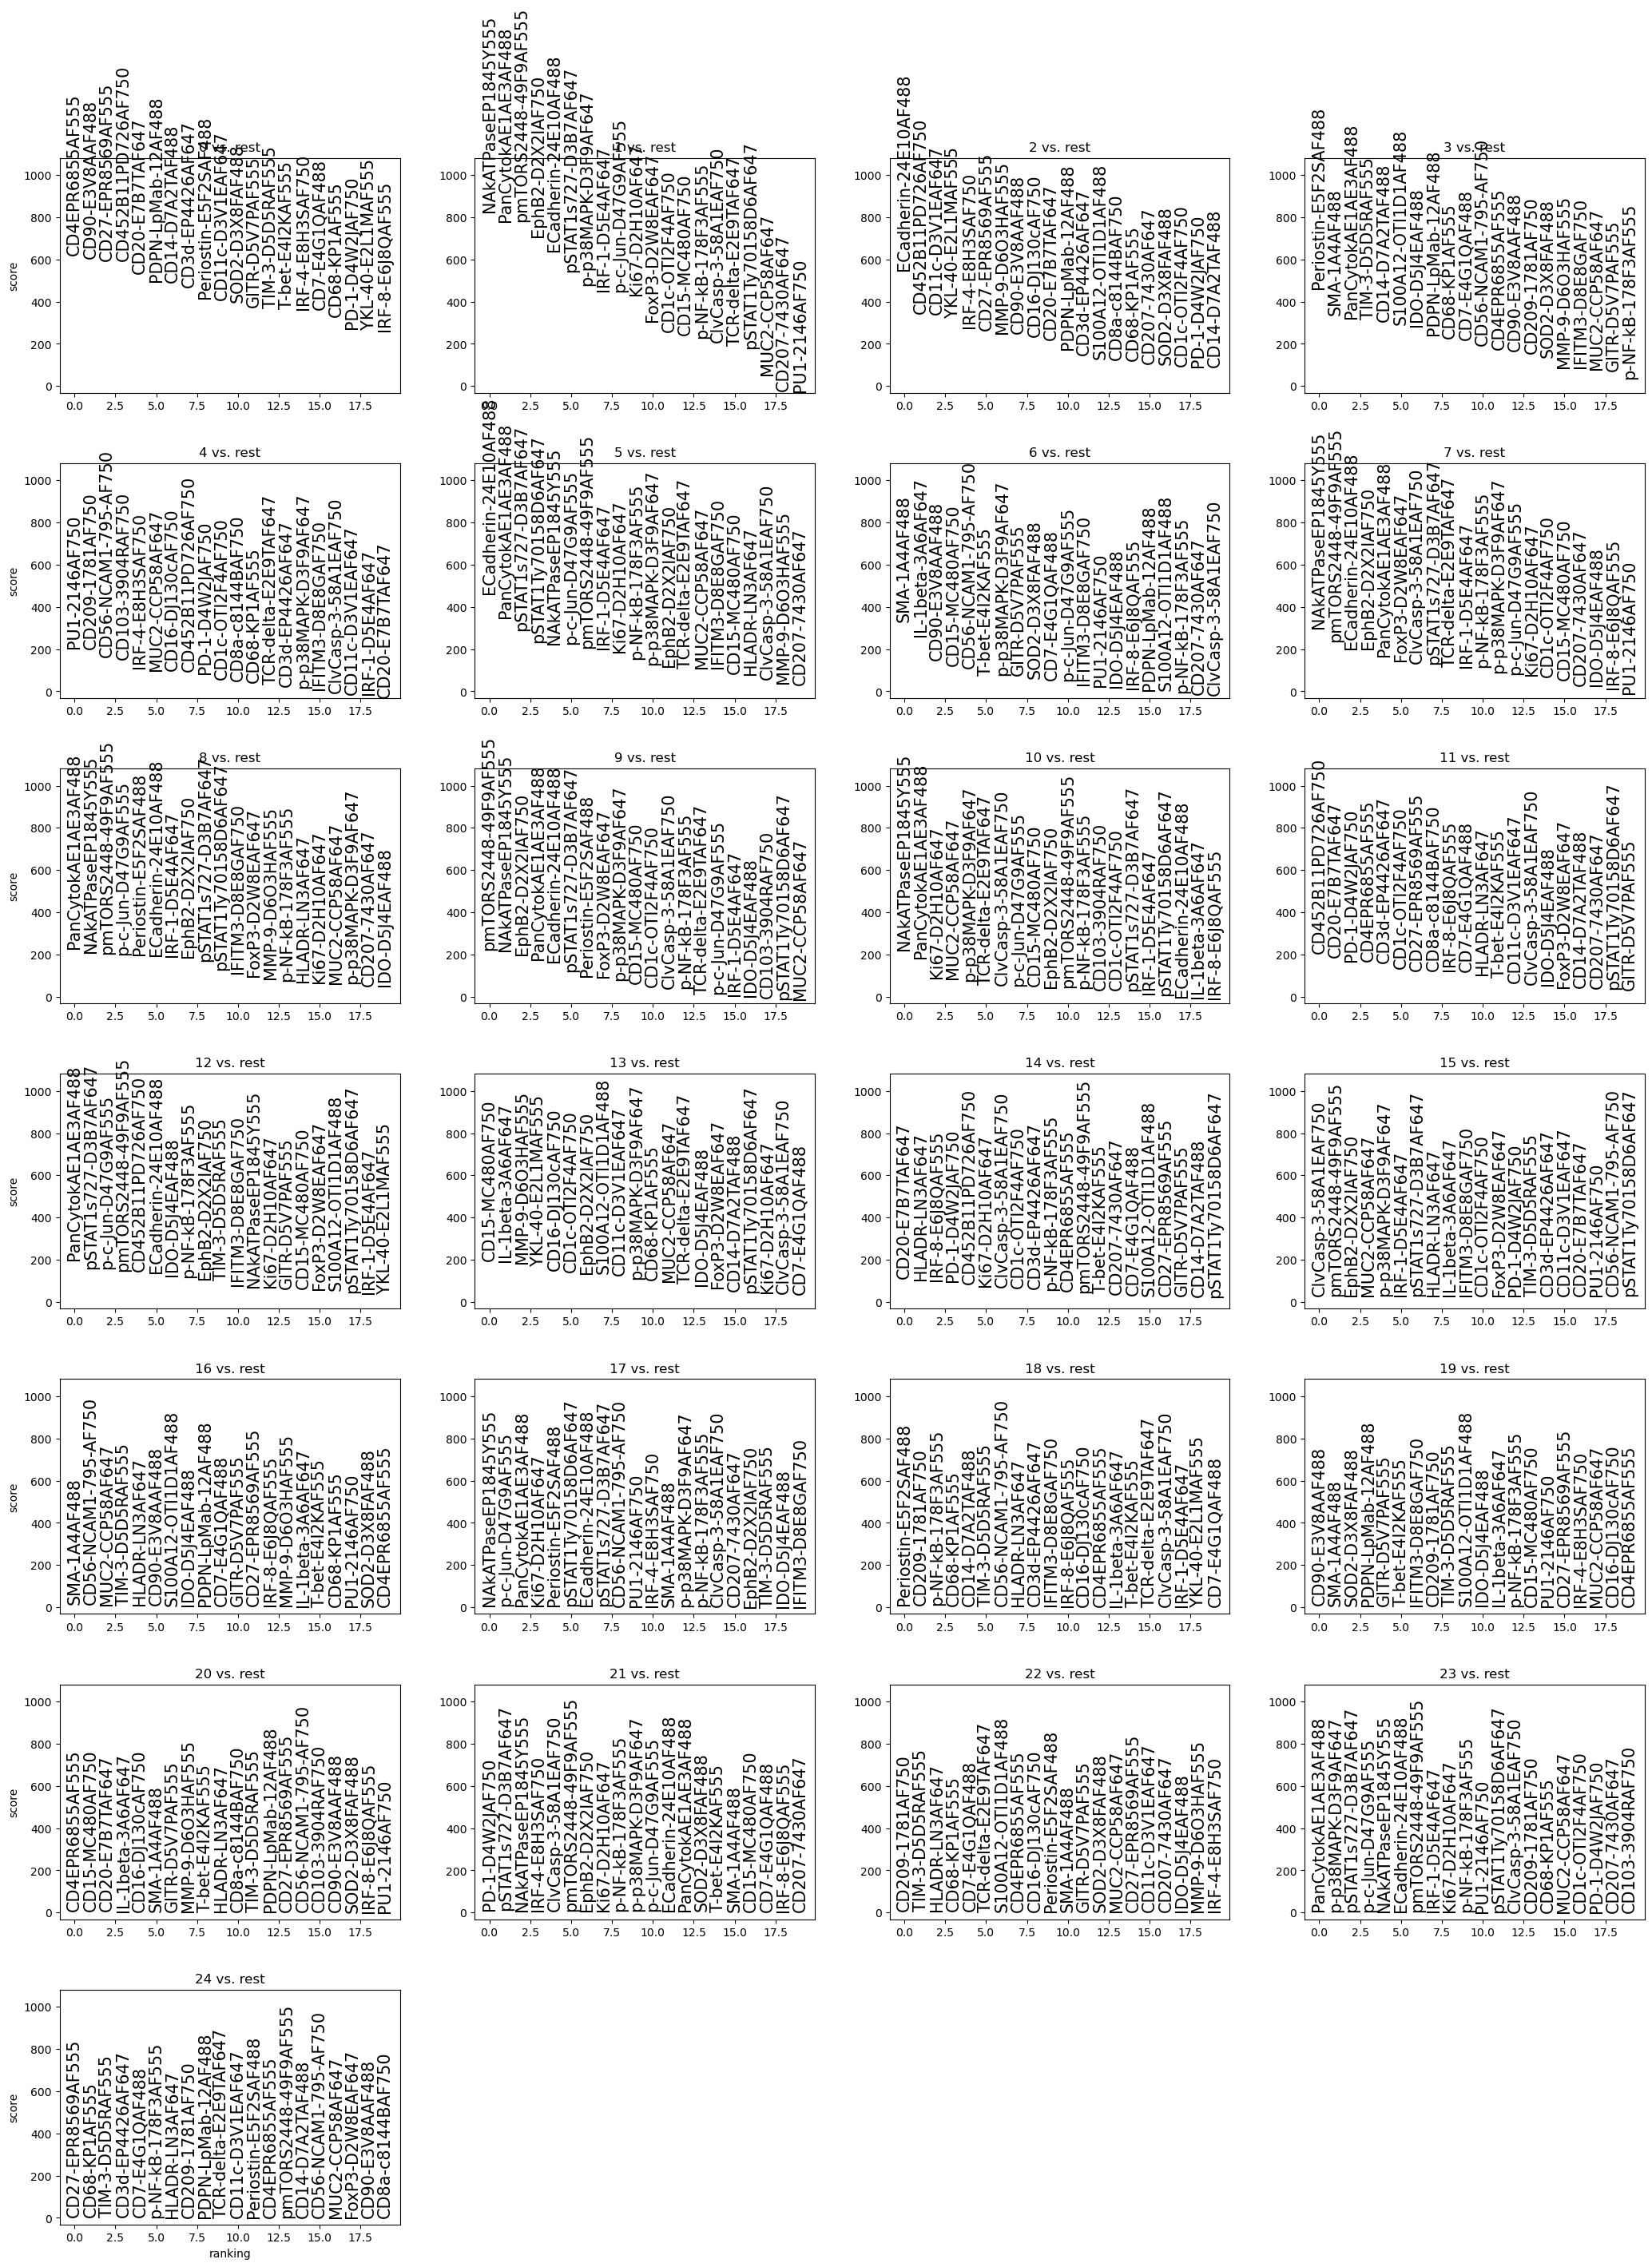

In [18]:
sc.pl.rank_genes_groups(adata, groupby='leiden',fontsize=15)